In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
att = pd.read_csv("att.csv", parse_dates=True)
att.head()

,Competition,Matchday,Date,Home,Away,Position,Attendance
0,Premier League,1,13 August 2017,Newcastle United,Tottenham Hotspur,4.0,"52,077"
1,Premier League,2,20 August 2017,Tottenham Hotspur,Chelsea,1.0,"73,587"
2,Premier League,3,27 August 2017,Tottenham Hotspur,Burnley,9.0,"67,862"
3,Premier League,4,9 September 2017,Everton,Tottenham Hotspur,5.0,"38,835"
4,Premier League,5,16 September 2017,Tottenham Hotspur,Swansea City,5.0,"65,366"


In [3]:
len(att)

803

In [8]:
# filter for only home games
teamlist = ["Lyon","AS Monaco","Paris Saint-Germain","Juventus","Napoli","Roma","Borussia Dortmund","Schalke 04","Bayern Munich",
"Atletico Madrid","Real Madrid","Barcelona","Tottenham Hotspur","Manchester City","Liverpool"]
homeatt = att[att['Home'].isin(teamlist)]
len(homeatt)

459

In [9]:
# read stadium capacity
cap = pd.read_csv('stad.csv')
cap

,Team,Capacity
0,Lyon,"59,186"
1,AS Monaco,"18,523"
2,Paris Saint-Germain,"47,929"
3,Juventus,"41,507"
4,Napoli,"60,240"
5,Roma,"70,634"
6,Borussia Dortmund,"81,360"
7,Schalke 04,"62,271"
8,Bayern Munich,"75,000"
9,Atletico Madrid,"67,703"


In [13]:
# merge on home team to include capacity
homeattcap = pd.merge(homeatt, cap, left_on='Home',right_on='Team', how='inner')
homeattcap.head()

,Competition,Matchday,Date,Home,Away,Position,Attendance,Team,Capacity
0,Premier League,2,20 August 2017,Tottenham Hotspur,Chelsea,1.0,"73,587",Tottenham Hotspur,"90,000"
1,Premier League,3,27 August 2017,Tottenham Hotspur,Burnley,9.0,"67,862",Tottenham Hotspur,"90,000"
2,Premier League,5,16 September 2017,Tottenham Hotspur,Swansea City,5.0,"65,366",Tottenham Hotspur,"90,000"
3,Premier League,8,14 October 2017,Tottenham Hotspur,Bournemouth,3.0,"73,502",Tottenham Hotspur,"90,000"
4,Premier League,9,22 October 2017,Tottenham Hotspur,Liverpool,3.0,"80,827",Tottenham Hotspur,"90,000"


In [29]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )
homeattcap['Attendance'] = homeattcap['Attendance'].apply(lambda x: locale.atoi(x))

In [31]:
homeattcap['Capacity'] = homeattcap['Capacity'].apply(lambda x: locale.atoi(x))

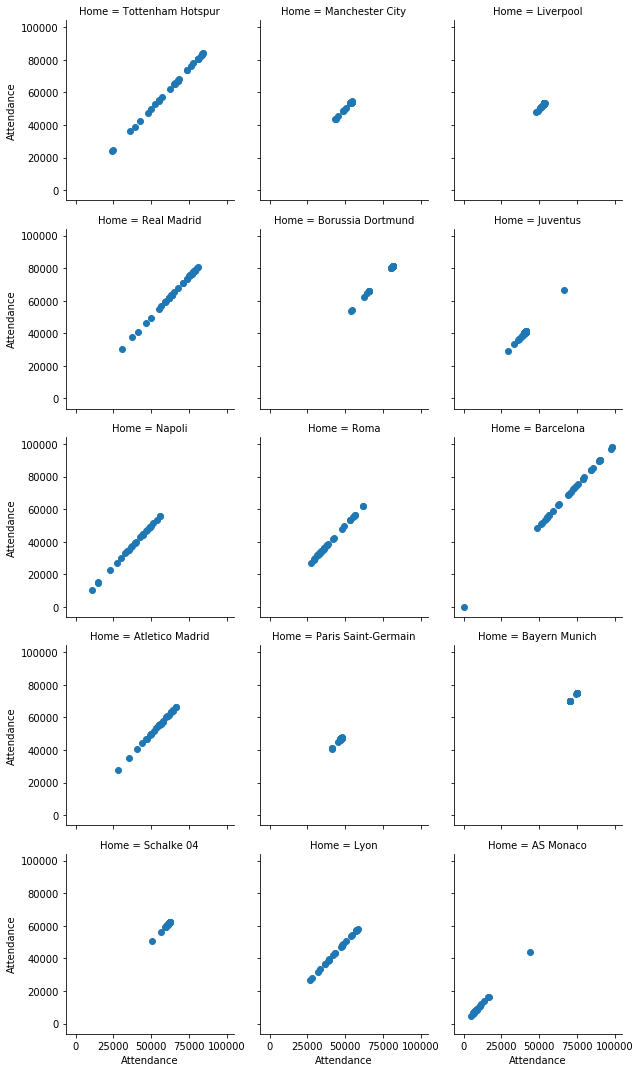

In [78]:
g = sns.FacetGrid(homeattcap, col="Home", col_wrap=3)
g.map(plt.scatter, 'Attendance','Attendance')
g.add_legend;

In [82]:
homeattcap[(homeattcap['Home']=='Barcelona')&(homeattcap['Attendance']<50000)]

,Competition,Matchday,Date,Home,Away,Position,Attendance,Team,Capacity,Attendance rate
261,La Liga,7,1 October 2017,Barcelona,Las Palmas,1.0,0,Barcelona,99354,0.000000
284,UEFA Champions League,6,5 December 2017,Barcelona,Sporting CP,NaN,48336,Barcelona,99354,0.486503


In [83]:
homeattcap[(homeattcap['Home']=='AS Monaco')&(homeattcap['Attendance']>25000)]

,Competition,Matchday,Date,Home,Away,Position,Attendance,Team,Capacity,Attendance rate
433,Trophee des Champions,1,29 July 2017,AS Monaco,Paris Saint-Germain,NaN,43761,AS Monaco,18523,2.362522


In [84]:
homeattcap[(homeattcap['Home']=='Juventus')&(homeattcap['Attendance']>60000)]

,Competition,Matchday,Date,Home,Away,Position,Attendance,Team,Capacity,Attendance rate
190,Coppa Italia,5,9 May 2018,Juventus,Milan,NaN,66400,Juventus,41507,1.59973


In [93]:
# remove outliers
homeattcap = homeattcap.drop(homeattcap[(homeattcap['Attendance rate']<0.1)|(homeattcap['Attendance rate']>1.0)].index)
len(homeattcap)

456

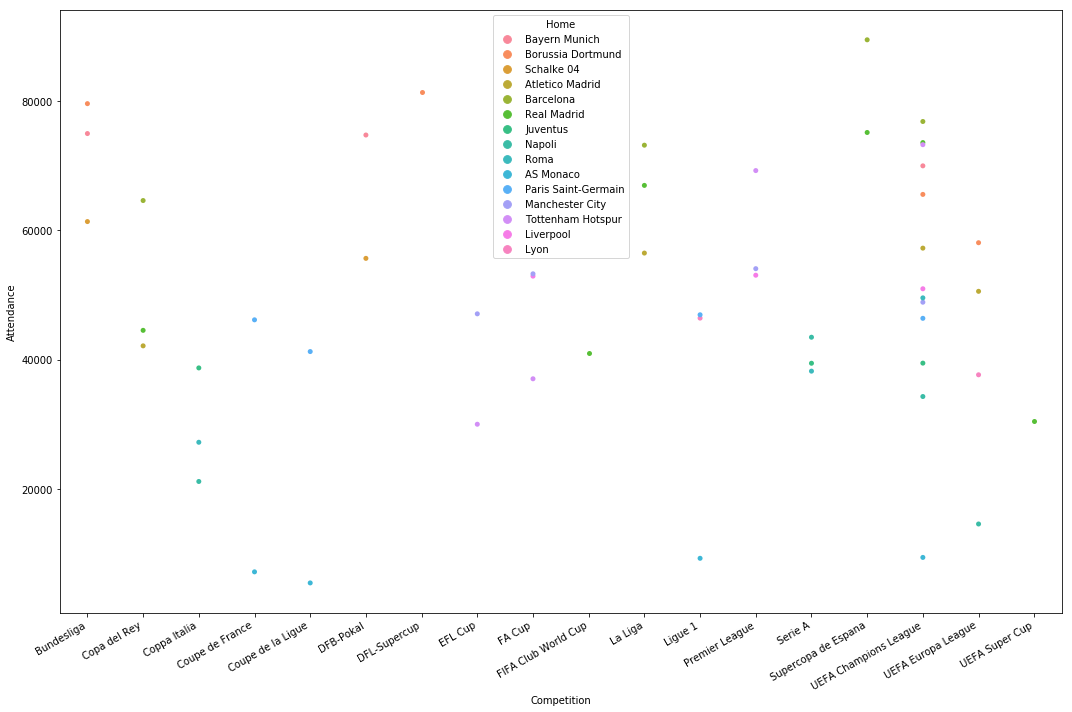

In [94]:
fig, ax = plt.subplots(figsize=(15,10))
sns.stripplot(x='Competition', y='Attendance', hue='Home', data=homeattcap.groupby(['Competition', 'Home'])['Attendance'].mean().reset_index(), ax=ax)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()

In [95]:
# makes sense to normalize to total capacity for better comparison
homeattcap['Attendance rate'] = homeattcap['Attendance']/homeattcap['Capacity']
homeattcap.head()

,Competition,Matchday,Date,Home,Away,Position,Attendance,Team,Capacity,Attendance rate
0,Premier League,2,20 August 2017,Tottenham Hotspur,Chelsea,1.0,73587,Tottenham Hotspur,90000,0.817633
1,Premier League,3,27 August 2017,Tottenham Hotspur,Burnley,9.0,67862,Tottenham Hotspur,90000,0.754022
2,Premier League,5,16 September 2017,Tottenham Hotspur,Swansea City,5.0,65366,Tottenham Hotspur,90000,0.726289
3,Premier League,8,14 October 2017,Tottenham Hotspur,Bournemouth,3.0,73502,Tottenham Hotspur,90000,0.816689
4,Premier League,9,22 October 2017,Tottenham Hotspur,Liverpool,3.0,80827,Tottenham Hotspur,90000,0.898078


In [96]:
# do teams have higher attendance rate at the end of the season vs at the beginning of the season?
homeattcap['Competition'].unique()

array(['Premier League', 'FA Cup', 'EFL Cup', 'UEFA Champions League',
       'La Liga', 'Supercopa de Espana', 'Copa del Rey', 'UEFA Super Cup',
       'FIFA Club World Cup', 'Bundesliga', 'DFL-Supercup',
       'UEFA Europa League', 'Serie A', 'Coppa Italia', 'Ligue 1',
       'Coupe de France', 'Coupe de la Ligue', 'DFB-Pokal'], dtype=object)

In [112]:
leaguelist = ['Premier League', 'La Liga', 'Bundesliga','Serie A', 'Ligue 1']
leagueatt = homeattcap[homeattcap['Competition'].isin(leaguelist)]
df1 = leagueatt[leagueatt['Matchday']<=10].groupby('Home')['Attendance rate'].mean().reset_index()
df1 = df1.rename(columns={'Attendance rate' : 'attrate_early'})

In [127]:
df2 = leagueatt[leagueatt['Matchday']>=28].groupby('Home')['Attendance rate'].mean().reset_index()
df2 = df2.rename(columns={'Attendance rate' : 'attrate_late'})

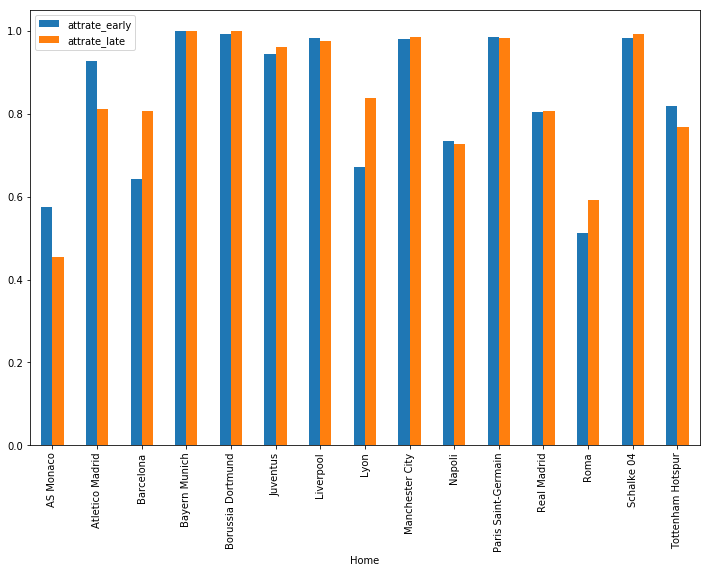

In [128]:
fig, ax = plt.subplots(figsize=(12,8))
pd.merge(df1, df2, on='Home', how='inner').plot(x='Home', kind='bar', ax=ax);

In [ ]:
# is the attendance greater in knockout champions league games vs group stage champions league games?
# fit a model to predict attendance....

In [130]:
homeattcap[(homeattcap['Competition']=='UEFA Champions League')&(homeattcap['Matchday']<=6)]['Attendance rate'].mean()

0.7991417276168954

In [131]:
homeattcap[(homeattcap['Competition']=='UEFA Champions League')&(homeattcap['Matchday']>6)]['Attendance rate'].mean()

0.900907021384257

In [136]:
homeattcap['Date']=pd.to_datetime(homeattcap['Date'])

In [139]:
homeattcap['Month'] = homeattcap['Date'].apply(lambda x: x.month)

In [ ]:
# does the attendance decrease in winter months (Dec, Jan, Feb)?

In [144]:
winteratt = homeattcap[homeattcap['Month'].isin([12,1,2])].groupby('Home')['Attendance rate'].mean().reset_index()
winteratt.rename(columns={'Attendance rate': 'attrate_winter'}, inplace=True)
nonwinteratt = homeattcap[~homeattcap['Month'].isin([12,1,2])].groupby('Home')['Attendance rate'].mean().reset_index()
nonwinteratt.rename(columns={'Attendance rate': 'attrate_nonwinter'},inplace=True)

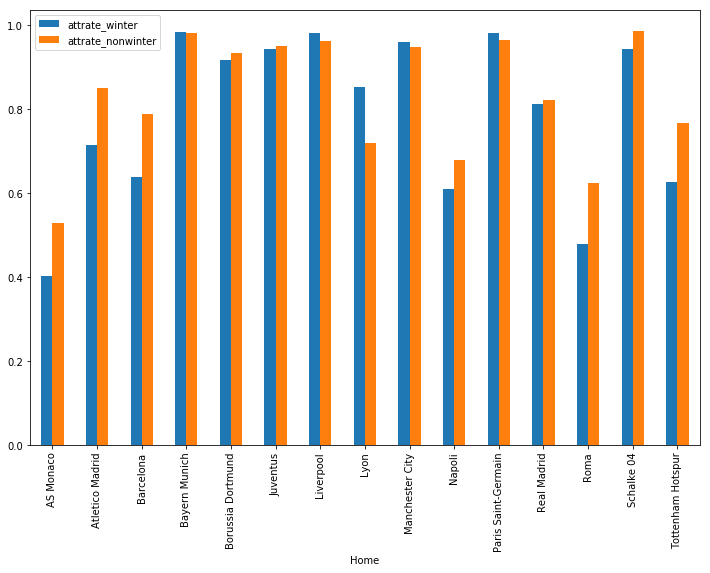

In [145]:
fig, ax = plt.subplots(figsize=(12,8))
pd.merge(winteratt, nonwinteratt, on='Home', how='inner').plot(x='Home', kind='bar', ax=ax);

In [ ]:
# does the attendance increase with the position of the team in the league

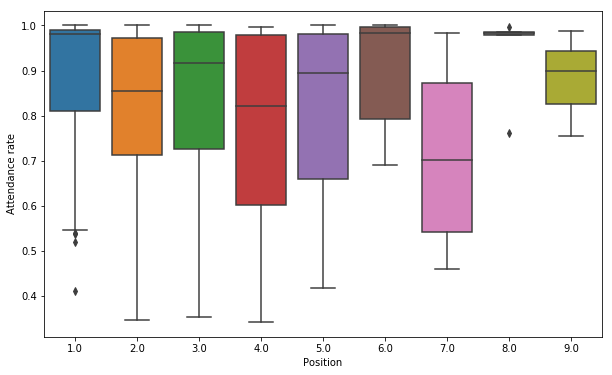

In [157]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='Position', y='Attendance rate', data=leagueatt, ax=ax);

In [ ]:
# does the attendance increase when playing other top teams?

In [161]:
# top opponents
topatt = homeattcap[homeattcap['Away'].isin(teamlist)]
nontopatt = homeattcap[~homeattcap['Away'].isin(teamlist)]
len(topatt)

124

In [163]:
from scipy import stats
stats.ttest_ind(topatt['Attendance rate'],nontopatt['Attendance rate'], equal_var=False)

Ttest_indResult(statistic=5.7009282204159373, pvalue=2.1483626798267069e-08)

In [171]:
topattmean = topatt.groupby('Home')['Attendance rate'].mean().reset_index().rename(columns={'Attendance rate' : 'attrate_top'})
nontopattmean = nontopatt.groupby('Home')['Attendance rate'].mean().reset_index().rename(columns={'Attendance rate' : 'attrate_nontop'})

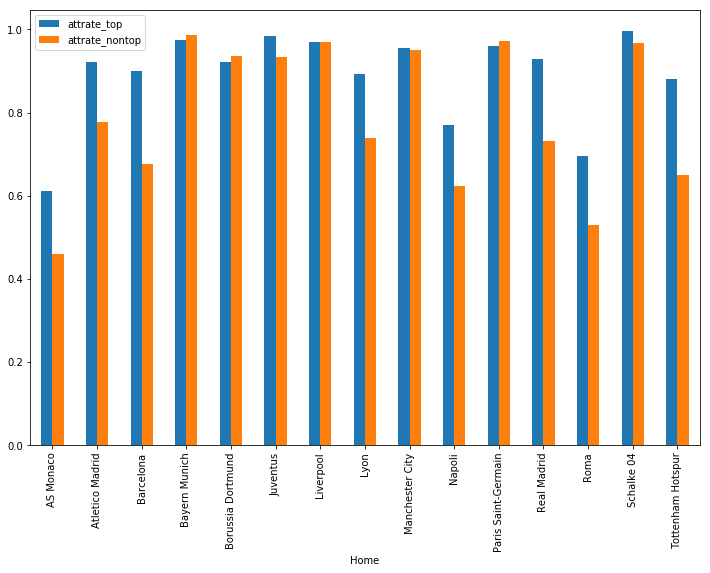

In [172]:
fig, ax = plt.subplots(figsize=(12,8))
pd.merge(topattmean, nontopattmean, on='Home', how='inner').plot(x='Home', kind='bar', ax=ax);